Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Taking hyperparameters from user / system:

In [2]:
cp = 2.9925; #cost_price
msp = 3.00; #minimum_selling_price 
n = 72; #number of iterations or number of price changes allowed
supply = 1869; # retail side stock
price_1 = 4.332; # initial price of the product
restocking = 0; # restocking price (>0 for perishable goods only)

Initiate / configure

In [3]:
price = np.zeros(shape = (n,1));
demand = np.zeros(shape = (n,1));
Alpha = np.zeros(shape = (n,1));
Target = np.zeros(shape = (n,1));
Earnings = np.zeros(shape = (n,1));
Grads = np.zeros(shape = (n,1));
price[0] = price_1;
pm = price[0] - cp;
tau = 1 / n;
mu = supply * tau;
sigma = 0.24 * mu;

Input previous demand (only required if current demand cannot be extracted from the system)

In [4]:
demand = [16,24,12,46,15,6,64,11,9,92,7,4,93,15,7,14,3,5,16,24,9,23,11,11,31,3,11,35,3,8,36,17,10,45,11,4,48,11,12,48,7,1,54,24,3,57,6,6,60,15,8,63,24,8,67,17,2,78,3,7,83,33,12,92,23,5,94,15,7,97,14,9];

Functions

In [5]:
def risky(demand, Target, Grads, iteration):
    if iteration == 1:
        g = demand[iteration] - Target[iteration];
        Grads[1] = g;
    else:
        g_1 = demand[iteration] - Target[iteration];
        g_2 = Grads[iteration - 1];
        Grads[iteration] = g_1 - g_2;
        g = Grads[iteration];
    return g, Grads 

In [6]:
def safe(demand, Target, Grads, iteration):
    if iteration == 1:
        g = demand[iteration] - Target[iteration];
        Grads[1] = g;
    else:
        g_1 = demand[iteration] - Target[iteration];
        g_2 = sum(Grads[:iteration - 1]) / (iteration - 1);
        Grads[iteration] = g_1 - g_2;
        g = Grads[iteration];
    return g, Grads

Loop for Gradient Descent

In [7]:
for iteration in range(n - 1):
    Alpha[iteration] = 14 / (1998 + iteration);
    Target[iteration] = np.random.normal(mu, sigma);
    #fprintf('Provide demand for iteration ');
    #iteration
    #demand(iteration) = input(': ');
    #[g, Grads] = risky(demand, Target, Grads, iteration);
    g, Grads = safe(demand, Target, Grads, iteration);
    price[iteration + 1] = price[iteration] + Alpha[iteration] * g;
    Earnings[iteration] = price[iteration] * demand[iteration];

Final definitions

In [8]:
sold = sum(demand)
#print('sold: ',format(sold))
unsold = supply - sum(demand)
#print('unsold: ',format(unsold))
cost_overage = cp + restocking
#print('cost_overage: ',format(cost_overage))
cost_underage = price_1 - cp
#print('cost_underage: ',format(cost_underage))
profit = sum(Earnings) - sold * cp
#print('profit: ',format(profit))
total_overage = profit - unsold * cost_overage
#print('total_overage: ',format(total_overage))

Plots

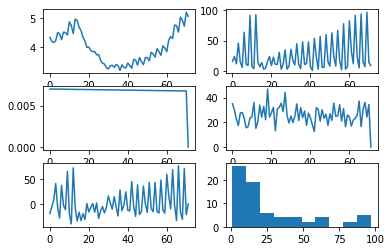

In [9]:
plt.subplot(3,2,1);
plt.plot(price);
plt.subplot(3,2,2);
plt.plot(demand);
plt.subplot(3,2,3);
plt.plot(Alpha);
plt.subplot(3,2,4);
plt.plot(Target);
plt.subplot(3,2,5);
plt.plot(Grads);
plt.subplot(3,2,6);
plt.hist(demand);